A: [[0.51879062 0.70301896]
 [0.3636296  0.97178208]]
b: [0.96244729 0.2517823 ]


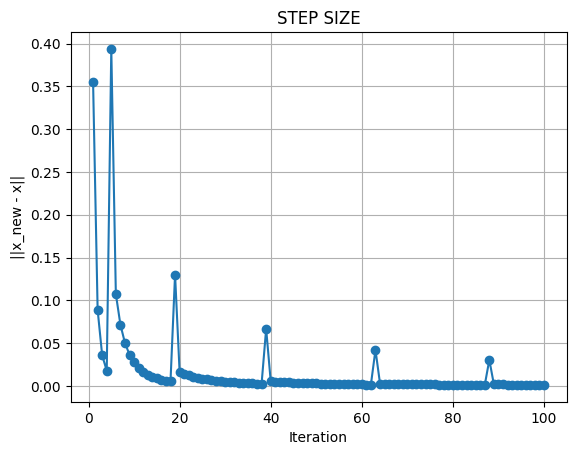

Optimal Solution: [0.9574108 0.0425892]
Objective Value: 0.20890534404695896


In [29]:
import numpy as np
import matplotlib.pyplot as plt

def objective_function(x, A, b):
    return np.linalg.norm(np.dot(A, x) - b) ** 2

def gradient(x, A, b):
    return 2 * np.dot(A.T, (np.dot(A, x) - b))

def linear_minimization(grad):
    if grad[0] <= grad[1]:
        return np.array([1, 0]) if grad[0] < 0 else np.array([0, 1])
    else:
        return np.array([0, 1]) if grad[1] < 0 else np.array([1 - 1e-6, 1e-6])

def frank_wolfe(x0, A, b, max_iters=100, tol=1e-6):
    x = np.array(x0)
    diffs = []
    
    for k in range(1, max_iters + 1):
        grad = gradient(x, A, b)
        s = linear_minimization(grad)
        step_size = 2 / (k + 2)
        x_new = x + step_size * (s - x)
        
        x_new[0] = max(0, x_new[0])
        x_new[1] = max(0, x_new[1])
        if x_new[0] + x_new[1] > 1:
            x_new /= (x_new[0] + x_new[1])
        
        diffs.append(np.linalg.norm(x_new - x))
        
        if np.linalg.norm(x_new - x) < tol:
            break
        x = x_new
    
    plt.plot(range(1, len(diffs) + 1), diffs, marker='o')
    plt.xlabel('Iteration')
    plt.ylabel('||x_new - x||')
    plt.title('STEP SIZE')
    plt.grid()
    plt.show()
    
    return x

A = np.random.rand(2, 2)
b = np.random.rand(2)     # Random 2D vector

print("A:", A)
print("b:", b)

x0 = np.random.rand(2)
x0 /= (x0[0] + x0[1] + 1e-6)  # Normalize to satisfy x1 + x2 <= 1

optimal_x = frank_wolfe(x0, A, b)
print("Optimal Solution:", optimal_x)
print("Objective Value:", objective_function(optimal_x, A, b))

Matrix A:
[[0.01075215 0.81666344 0.42727633 0.68162103 0.49851144]
 [0.12835275 0.74466455 0.93115613 0.95829987 0.98549314]
 [0.76067032 0.6738648  0.63168958 0.14139247 0.14696937]]

True optimal solution x_star: [1. 0. 0. 0. 0.]

Vector b = A @ x_star: [0.01075215 0.12835275 0.76067032]
grad=[-0.27407257  1.32618995  1.20900303  1.775308    1.62951829]
values=[0.27407257 1.32618995 1.20900303 1.775308   1.62951829]
max_index=3
vertices[max_index]=[0. 0. 0. 1. 0.]
grad=[-0.56779352  1.4401923   1.29402152  2.14517644  1.95827694]
values=[0.56779352 1.4401923  1.29402152 2.14517644 1.95827694]
max_index=3
vertices[max_index]=[0. 0. 0. 1. 0.]
grad=[-0.64122376  1.46869288  1.31527614  2.23764355  2.0404666 ]
values=[0.64122376 1.46869288 1.31527614 2.23764355 2.0404666 ]
max_index=3
vertices[max_index]=[0. 0. 0. 1. 0.]
grad=[-0.67059586  1.48009312  1.32377799  2.27463039  2.07334247]
values=[0.67059586 1.48009312 1.32377799 2.27463039 2.07334247]
max_index=3
vertices[max_index]=[0. 0

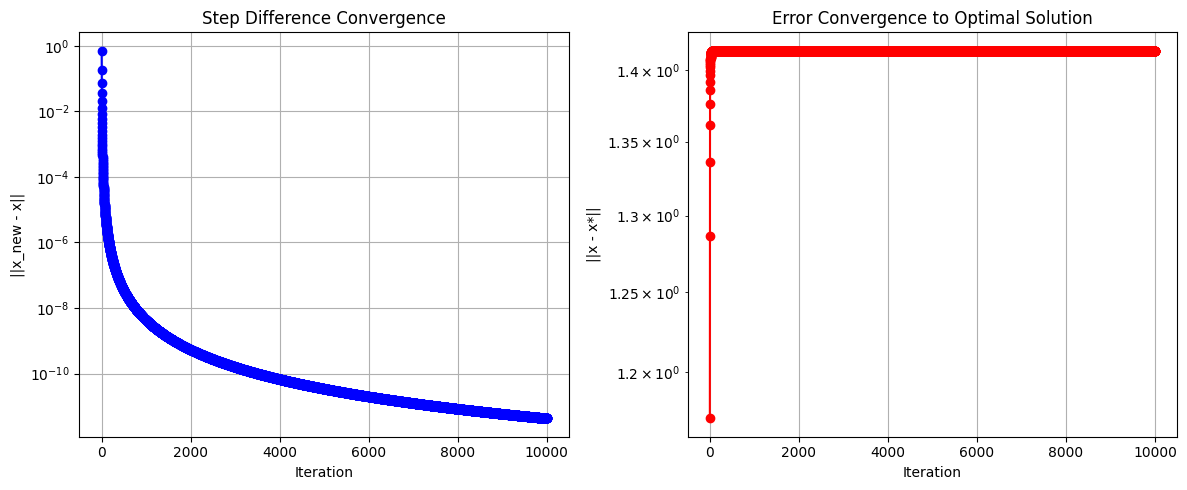


Computed optimal solution: [3.67551728e-09 5.31212609e-09 2.82604253e-09 9.99999981e-01
 7.12525635e-09]
Objective value at optimal_x: 1.5223823112323165
Distance from x_star: 1.4142135463822567


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def objective_function(x, A, b):
    return np.linalg.norm(np.dot(A, x) - b) ** 2

def gradient(x, A, b):
    return 2 * np.dot(A.T, (np.dot(A, x) - b))

def linear_minimization(grad):
    print(f'grad={grad}')
    vertices = np.eye(len(grad))
    values = abs(grad)
    print(f'values={values}')
    max_index = np.argmax(values)
    print(f'max_index={max_index}')
    print(f'vertices[max_index]={vertices[max_index]}')
    return vertices[max_index]

def linear_minimizationII(grad):
    print(f'grad={grad}')
    vertices = np.eye(len(grad))
    values = abs(grad)
    print(f'values={values}')
    min_index = np.argmin(grad)
    print(f'min_index={min_index}')
    print(f'vertices[min_idx]={vertices[min_index]}')
    return vertices[min_index]

def frank_wolfe(x0, A, b, x_star, max_iters=10000, tol=1e-6):
    x = np.array(x0, dtype=np.float64)
    errors = []
    diffs = []
    
    for k in range(1, max_iters + 1):
        grad = gradient(x, A, b)
        s = linear_minimization(grad)
        step_size = 2.0 / (k + 2)
        x_new = x + step_size * (s - x)
        
        x_new = np.clip(x_new, 0.0, None)
        sum_x_new = x_new.sum()
        if sum_x_new > 1.0:
            x_new /= sum_x_new
        
        current_error = np.linalg.norm(x_new - x_star)
        errors.append(current_error)
        diff = np.linalg.norm(x_new - x)
        diffs.append(diff)
        
        if np.linalg.norm(x_star - x) < tol:
            x = x_new
            break
        x = x_new
    
    # Plotting
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.semilogy(range(1, len(diffs) + 1), diffs, marker='o', color='blue')
    plt.xlabel('Iteration')
    plt.ylabel('||x_new - x||')
    plt.title('Step Difference Convergence')
    plt.grid(True)
    
    plt.subplot(1, 2, 2)
    plt.semilogy(range(1, len(errors) + 1), errors, marker='o', color='red')
    plt.xlabel('Iteration')
    plt.ylabel('||x - x*||')
    plt.title('Error Convergence to Optimal Solution')
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()
    
    return x

# Generate data
n = 5  # Dimension of x
m = 3  # Dimension of b
A = np.random.rand(m, n)
x_star = np.zeros(n)  # Sparse optimal solution
x_star[0] = 1.0  # Set the first component to 1, others to 0
b = A @ x_star  # Set b as A * x_star

print("Matrix A:")
print(A)
print("\nTrue optimal solution x_star:", x_star)
print("\nVector b = A @ x_star:", b)

# Initial feasible point
x0 = np.random.rand(n)
x0 /= x0.sum()  # Normalize to meet sum(x) = 1

# Run Frank-Wolfe algorithm
optimal_x = frank_wolfe(x0, A, b, x_star, max_iters=10000, tol=1e-6)

print("\nComputed optimal solution:", optimal_x)
print("Objective value at optimal_x:", objective_function(optimal_x, A, b))
print("Distance from x_star:", np.linalg.norm(optimal_x - x_star))